In [1]:
import numpy as np
import pandas as pd

In [2]:
data1=pd.read_csv('crimedata_preprocessed.csv')

In [3]:
data1.head()

,Category,DayOfWeek,PdDistrict,Hour,Distance,Address_area,Month,Day_of_month
0,0,0,0,0,0.0301,0,1,23
1,4,1,1,0,0.0301,1,2,7
2,5,0,0,0,0.0301,2,6,2
3,1,0,0,0,0.0301,3,8,21
4,4,3,0,0,0.0301,1,9,27


In [34]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
import keras

In [5]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [6]:
dataset.values

NameError: name 'dataset' is not defined

In [7]:
# load dataset
dataset = read_csv('crimedata_preprocessed.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,0] = encoder.fit_transform(values[:,0])
# ensure all data is float
#values = values.astype('float32')
# normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(values, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
#print(reframed.head())

In [8]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,0.0,0.0,0.0,0.0301,0.0,1.0,23.0,1.0,1.0,0.0,0.0301,1.0,2.0,7.0
2,1.0,1.0,0.0,0.0301,1.0,2.0,7.0,0.0,0.0,0.0,0.0301,2.0,6.0,2.0
3,0.0,0.0,0.0,0.0301,2.0,6.0,2.0,0.0,0.0,0.0,0.0301,3.0,8.0,21.0
4,0.0,0.0,0.0,0.0301,3.0,8.0,21.0,3.0,0.0,0.0,0.0301,1.0,9.0,27.0
5,3.0,0.0,0.0,0.0301,1.0,9.0,27.0,3.0,0.0,0.0,0.0301,1.0,9.0,27.0


In [16]:
# split into train and test sets
values = reframed.values
n_train_hours = 756413
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, 0]
test_X, test_y = test[:, :-1], test[:, 0]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(756413, 1, 13) (756413,) (121635, 1, 13) (121635,)


In [19]:
len(np.unique(train_y))

7

In [11]:
from keras.utils import to_categorical

In [24]:
data_train = train_y
data_test = test_y
# one hot encode
y_test_one = to_categorical(data_test)
print(y_test_one)
y_train_one = to_categorical(data_train)
print(y_test_one)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [21]:
num_classes=len(np.unique(train_y))

Train on 756413 samples, validate on 121635 samples
Epoch 1/100
 - 30s - loss: 1.9448 - acc: 0.1493 - val_loss: 1.9447 - val_acc: 0.1526
Epoch 2/100
 - 25s - loss: 1.9436 - acc: 0.1574 - val_loss: 1.9440 - val_acc: 0.1526
Epoch 3/100
 - 26s - loss: 1.9424 - acc: 0.1576 - val_loss: 1.9428 - val_acc: 0.1525
Epoch 4/100
 - 27s - loss: 1.9404 - acc: 0.1603 - val_loss: 1.9406 - val_acc: 0.1525
Epoch 5/100
 - 26s - loss: 1.9364 - acc: 0.1664 - val_loss: 1.9356 - val_acc: 0.1527
Epoch 6/100
 - 26s - loss: 1.9284 - acc: 0.1871 - val_loss: 1.9255 - val_acc: 0.1529
Epoch 7/100
 - 26s - loss: 1.9092 - acc: 0.2494 - val_loss: 1.8976 - val_acc: 0.2388
Epoch 8/100
 - 26s - loss: 1.8472 - acc: 0.3612 - val_loss: 1.7974 - val_acc: 0.3915
Epoch 9/100
 - 26s - loss: 1.6838 - acc: 0.3414 - val_loss: 1.6316 - val_acc: 0.2953
Epoch 10/100
 - 26s - loss: 1.4952 - acc: 0.3305 - val_loss: 1.4716 - val_acc: 0.3032
Epoch 11/100
 - 25s - loss: 1.3688 - acc: 0.3976 - val_loss: 1.5018 - val_acc: 0.3334
Epoch 12/10

Epoch 96/100
 - 28s - loss: 0.1403 - acc: 0.9536 - val_loss: 0.6419 - val_acc: 0.7491
Epoch 97/100
 - 26s - loss: 0.1743 - acc: 0.9429 - val_loss: 0.4963 - val_acc: 0.7990
Epoch 98/100
 - 26s - loss: 0.1858 - acc: 0.9393 - val_loss: 0.8176 - val_acc: 0.6882
Epoch 99/100
 - 26s - loss: 0.1648 - acc: 0.9456 - val_loss: 0.5820 - val_acc: 0.7970
Epoch 100/100
 - 25s - loss: 0.1748 - acc: 0.9416 - val_loss: 0.6695 - val_acc: 0.7650


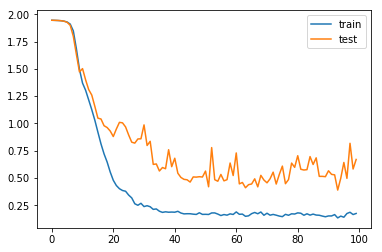

Saved model to disk


In [45]:
model = Sequential()
model.add(LSTM(100,return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2], )))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
# fit network
history = model.fit(train_X, y_train_one, epochs=100, batch_size=1000, validation_data=(test_X, y_test_one), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# Log loss graph

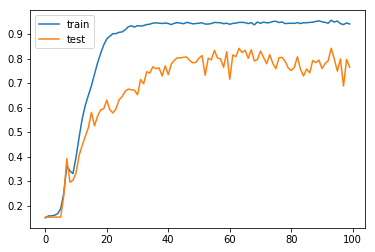

In [47]:
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

# Accuracy plot

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)